# Cavity QED

### Дисперсионный и резонансный сдвиги

In [1]:
import numpy as np
import scipy.linalg
from numpy import kron as tp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
osc_levels = 10
E_q = np.diag([1,1])
sigma_x = np.array([[0,1],[1,0]])
sigma_z = np.array([[1,0],[0,-1]])
sigma_m = np.array([[0, 0],[1,0]])
sigma_p = np.array([[0,1],[0,0]])
varepsilon = 1 #GHz
omega = 1 #GHz
g = 0.1
g1 = 1
ME = 0
def a():
    return np.diag([np.sqrt(x) for x in range(1, osc_levels)],1)
def a_p():
    return np.diag([np.sqrt(x) for x in range(1, osc_levels)],-1)

def build_H_0():
    E_r = np.diag(np.ones(osc_levels))
    H_q = tp(E_r, sigma_z*varepsilon/2)
    H_r = tp(omega*np.diag([0.5 + _ for _ in range(0, osc_levels)]), E_q)
    return H_q+H_r
def build_H_i():
    return g*tp(a() + a_p(), sigma_x)
def build_H_i_RWA():
    return g*(tp(a_p(), sigma_m)+tp(a(), sigma_p))

def build_H_0_MF():
    E_r = np.diag(np.ones(osc_levels))
    H_q = tp(E_r, sigma_z*varepsilon/2+sigma_x*delta/2)
    H_r = tp(omega*np.diag([0.5 + _ for _ in range(0, osc_levels)]), E_q)
    return H_q+H_r

##################### Test

def build_H_0_test():
    E_r = np.diag(np.ones(osc_levels))
    H_q = tp(E_r, sigma_z*sqrt(varepsilon**2+delta**2)/2)
    H_r = tp(omega*np.diag([0.5 + _ for _ in range(0, osc_levels)]), E_q)
    return H_q+H_r
def build_H_i_test():
    return g*tp(a() + a_p(), delta/sqrt(varepsilon**2+delta**2)*sigma_z-
                     varepsilon/sqrt(varepsilon**2+delta**2)*sigma_x)
def build_H_i_RWA_test():
    return -g*varepsilon/sqrt(varepsilon**2+delta**2)*(tp(a_p(), sigma_m)+tp(a(), sigma_p))\
#                     +g_test*varepsilon_test/sqrt(Delta_test**2+varepsilon_test**2)*tp(a_p()+a(), sigma_z)
def build_H_i_RWA_test2():
    return -g*varepsilon/sqrt(varepsilon**2+delta**2)*(tp(a_p(), sigma_m)+tp(a(), sigma_p))\
                    +g*delta/sqrt(varepsilon**2+delta**2)*tp(a_p()+a(), sigma_z)

In [3]:
def solve_eigenproblem(RWA=False, MF=False):
    H = (build_H_0() if MF==False else build_H_0_MF())+ ( build_H_i_RWA() if RWA==True else build_H_i())
    evals_unpert, evecs_unpert = scipy.linalg.eigh(build_H_0() if MF==False else build_H_0_MF())
    evals, evecs = scipy.linalg.eigh(H)
    return evals_unpert, evecs_unpert, evals, evecs

In [4]:
def solve_eigenproblem_test(RWA=False):
    H = build_H_0_test()+ ( build_H_i_RWA_test() if RWA==True else build_H_i_test())
    evals_unpert, evecs_unpert = scipy.linalg.eigh(build_H_0_test())
    evals, evecs = scipy.linalg.eigh(H)
    return evals_unpert, evecs_unpert, evals, evecs
def solve_eigenproblem_test2(RWA=False):
    H = build_H_0_test()+ ( build_H_i_RWA_test2() if RWA==True else build_H_i_test())
    evals_unpert, evecs_unpert = scipy.linalg.eigh(build_H_0_test())
    evals, evecs = scipy.linalg.eigh(H)
    return evals_unpert, evecs_unpert, evals, evecs

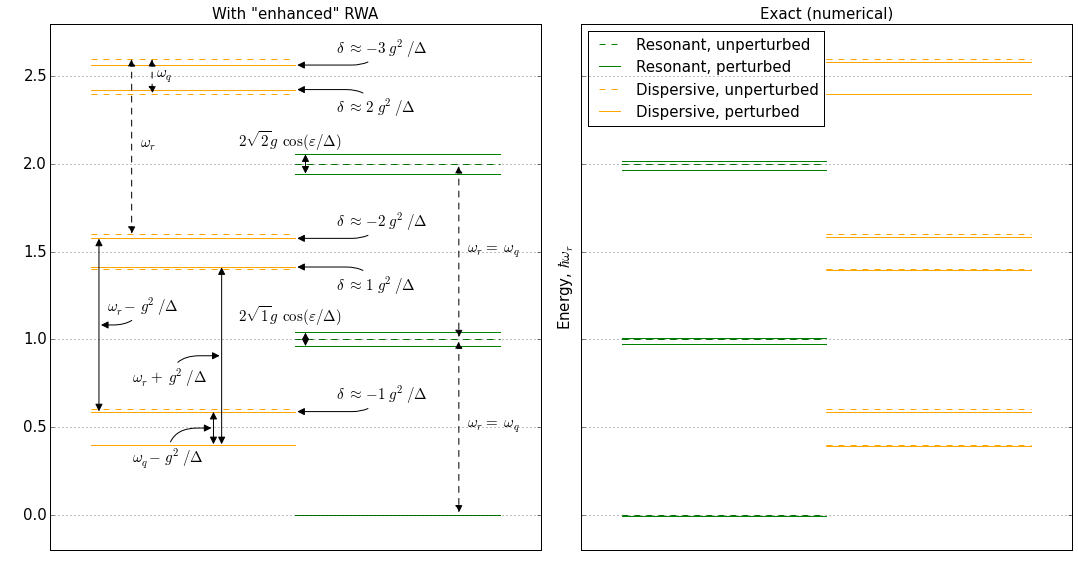

In [67]:
varepsilon = .2
delta =  0.97975
omega = 1 
g = 0.1
evals_unpert, evecs_unpert, evals_res, evecs_res = solve_eigenproblem_test()

varepsilon = 0.2
delta = 0
omega=1
g=0.1
evals_unpert_disp, evecs_unpert_disp, evals_disp, evecs_disp = solve_eigenproblem_test()

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
axes=axes[::-1]

X = np.linspace(-2.5, 0, 100)
axes[0].plot(X, evals_unpert[0]*ones_like(X), '--g', label="Resonant, unperturbed")
axes[0].plot(X, evals_res[0]*ones_like(X), 'g', label="Resonant, perturbed")
X = np.linspace(0, 2.5, 100)
axes[0].plot(X, evals_unpert_disp[0]*ones_like(X), '--', color="orange", label="Dispersive, unperturbed")
axes[0].plot(X, evals_disp[0]*ones_like(X), 'orange', label="Dispersive, perturbed")

for i in range(1, 6):
    X = np.linspace(-2.5, 0, 100)
    axes[0].plot(X, evals_unpert[i]*ones_like(X), '--g')
    axes[0].plot(X, evals_res[i]*ones_like(X), 'g')
    
    X = np.linspace(0, 2.5, 100)
    axes[0].plot(X, evals_unpert_disp[i]*ones_like(X),  '--', color="orange")
    axes[0].plot(X, evals_disp[i]*ones_like(X), 'orange')

varepsilon = .2
delta =  0.97975
omega = 1 
g = 0.2
evals_unpert, evecs_unpert, evals_res, evecs_res = solve_eigenproblem_test(True)

varepsilon = 0.2
delta = 0
omega=1
g=0.1
evals_unpert_disp, evecs_unpert_disp, evals_disp, evecs_disp = solve_eigenproblem_test(True)

X = np.linspace(0, 2.5, 100)
axes[1].plot(X, evals_unpert[0]*ones_like(X), '--g', label="Resonant, unperturbed")
axes[1].plot(X, evals_res[0]*ones_like(X), 'g', label="Resonant, perturbed")
X = np.linspace(-2.5, 0, 100)
axes[1].plot(X, evals_unpert_disp[0]*ones_like(X), '--', color="orange", label="Dispersive, unperturbed")
axes[1].plot(X, evals_disp[0]*ones_like(X), color="orange", label="Dispersive, perturbed")


enrg_shift_for_disp_annt = 1
for i in range(1, 6):
    
    X = np.linspace(0, 2.5, 100)
    axes[1].plot(X, evals_unpert[i]*ones_like(X), '--g')
    axes[1].plot(X, evals_res[i]*ones_like(X), 'g')
    axes[1].annotate('', (0.125, evals_res[2*i-1]-0.01), (0.125, evals_res[2*i]+0.01), \
                     arrowprops={'arrowstyle':'<|-|>', "facecolor":"black"});
    axes[1].annotate(r'$2\sqrt{{%i}}g\,\cos(\varepsilon/\Delta)$'%i, (0.125, 0.5*(evals_res[2*i-1]+evals_res[2*i])), \
                     (-.7, .1+0.5*(evals_res[2*i-1]+evals_res[2*i])), fontsize=15)
    if(i<3):
        axes[1].annotate('', (2, sorted(evals_unpert)[2*i-2]), (2, sorted(evals_unpert)[2*i-1]), \
                         arrowprops={'arrowstyle':'<|-|>', 'linestyle':'dashed', "facecolor":"black"}, fontsize=15);
        axes[1].annotate('$\\omega_r=\\,\\omega_q$',\
                         (2, 0.5*(evals_res[2*i-2]+evals_res[2*i-1])), \
                         (2.1, 0.5*(evals_unpert[i*2-2]+evals_unpert[i*2-1])), fontsize=15)

    
    X = np.linspace(-2.5, 0, 100)
    def even():
        return -1 if i%2==0 else 1
    axes[1].plot(X, evals_unpert_disp[i]*ones_like(X), '--', color="orange")
    axes[1].plot(X, evals_disp[i]*ones_like(X), color="orange")

    axes[1].annotate('$\delta\\ \\approx\\ {%i}\\ g^2/\Delta}$'%(-even()*enrg_shift_for_disp_annt),\
                     (0, evals_disp[i]), \
                     (0.5, evals_disp[i]-.03 + even()*0.1), arrowprops={'arrowstyle':'-|>', \
                    'connectionstyle':"angle,angleA=90,angleB=0,rad=30", "facecolor":"black"}, fontsize=15)
    if i%2 == 0:
        enrg_shift_for_disp_annt+=1
        
#####Annotations####

# Trans freqs for dispersive regime

axes[1].annotate('', (-1, evals_disp[0]-0.01), (-1, evals_disp[1]+0.01), \
                         arrowprops={'arrowstyle':'<|-|>', "facecolor":"black"})

axes[1].annotate('$\\omega_q -\, g^2/\\Delta$',\
                     (-1, 0.5*evals_disp[0]+0.5*evals_disp[1]), \
                     (-2, 0.3), arrowprops={'arrowstyle':'-|>', \
                    'connectionstyle':"angle,angleA=90,angleB=0,rad=30", "facecolor":"black"}, fontsize=15)

axes[1].annotate('', (-0.9, evals_disp[0]-0.01), (-0.9, evals_disp[2]+0.01), \
                         arrowprops={'arrowstyle':'<|-|>', "facecolor":"black"}, fontsize=15)

axes[1].annotate('$\\omega_r +\, g^2/\\Delta$',\
                     (-0.9, 0.5*evals_disp[0]+0.5*evals_disp[2]), \
                     (-2, -0.15+0.5*evals_disp[0]+0.5*evals_disp[2]),\
                     arrowprops={'arrowstyle':'-|>', \
                    'connectionstyle':"angle,angleA=90,angleB=0,rad=30", "facecolor":"black"}, fontsize=15)


axes[1].annotate('', (-2.4, evals_disp[1]-0.01), (-2.4, evals_disp[3]+0.01), \
                         arrowprops={'arrowstyle':'<|-|>', "facecolor":"black"}, fontsize=15)

axes[1].annotate('$\\omega_r -\, g^2/\\Delta$',\
                     (-2.4, 0.5*evals_disp[1]+0.5*evals_disp[3]), \
                     (-2.3, 0.08+0.5*evals_disp[1]+0.5*evals_disp[3]), \
                     arrowprops={'arrowstyle':'-|>', \
                    'connectionstyle':"angle,angleA=90,angleB=0,rad=30", "facecolor":"black"}, fontsize=15)

axes[1].annotate('', (-2, evals_unpert_disp[3]-0.01), (-2, evals_unpert_disp[5]+0.01), \
                         arrowprops={'arrowstyle':'<|-|>', "facecolor":"black", "linestyle":"dashed"}, fontsize=15)

axes[1].annotate(r'$\omega_r$',\
                         (-1.9, .1+0.5*(evals_unpert_disp[3]+evals_unpert_disp[5])), \
                         (-1.9, 0.5*(evals_unpert_disp[3]+evals_unpert_disp[5])), fontsize=15)

axes[1].annotate('', (-1.75, evals_unpert_disp[4]-0.01), 
                     (-1.75, evals_unpert_disp[5]+0.01), 
                      arrowprops={'arrowstyle':'<|-|>', "facecolor":"black", "linestyle":"dashed"}, fontsize=15)

axes[1].annotate(r'$\omega_q$',\
                         (-1.7, .1+0.5*(evals_unpert_disp[4]+evals_unpert_disp[5])), \
                         (-1.7, 0.5*(evals_unpert_disp[4]+evals_unpert_disp[5])), fontsize=15)
####################

plt.ylim(-.2, 2.8)
axes[0].legend(loc="upper left", fontsize=15)
axes[0].set_title("Exact (numerical)", fontsize = 15)
axes[1].set_title("With \"enhanced\" RWA", fontsize = 15)
axes[0].set_ylabel(r"Energy, $\hbar \omega_r$", fontsize = 15)
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[0].grid()
axes[1].grid()
plt.tight_layout()
plt.savefig("../Собсно диплом/Pictures/JCM_levels.png", dpi=200)

### Зависимость решения от числа уровней

(0, 1.5e-13)

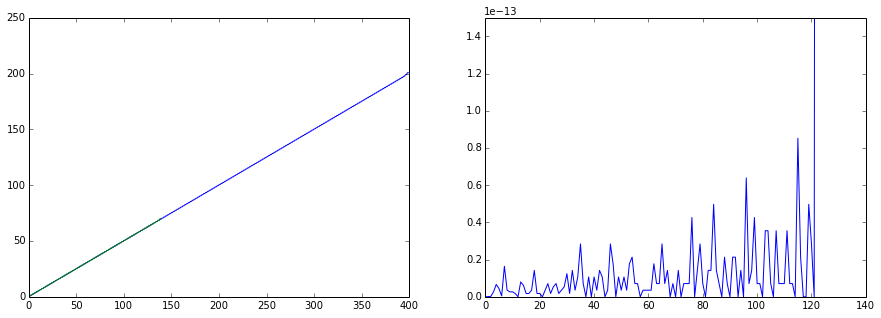

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
osc_levels = 70
b = scipy.linalg.eigh(build_H_0()+build_H_i())[0]
osc_levels = 200
a = scipy.linalg.eigh(build_H_0()+build_H_i())[0] 
axes[0].plot(a)
axes[0].plot(b)
axes[1].plot(list(map(lambda x,y : abs(x-y), a, b)))
axes[1].set_ylim(0, 1.5e-13)

In [181]:
from IPython.display import clear_output
import sys
import scipy.linalg

In [146]:
osc_levels = 70
a = scipy.linalg.eigh(build_H_0()+build_H_i())[0]
diffs = []
osc_levels_arr = range(70, 1000, 10)
for i in osc_levels_arr:
    print(i)
    sys.stdout.flush()
    osc_levels = i
    b = scipy.linalg.eigh(build_H_0()+build_H_i())[0]
    diffs.append(list(map(lambda x,y : (x-y), a[:-20], b)))
    clear_output()

In [201]:
diffs_sp = np.array(diffs)

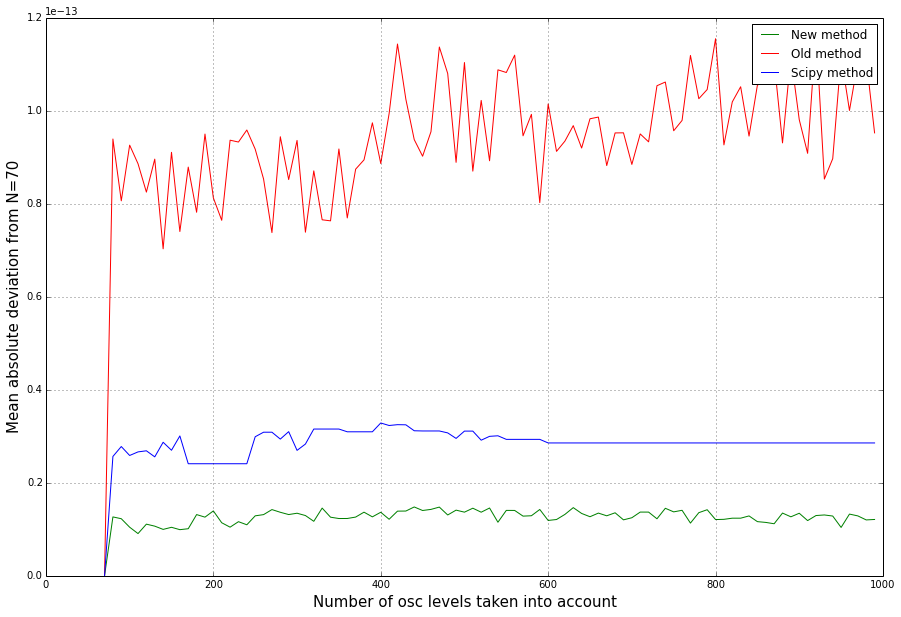

In [214]:
plt.plot(osc_levels_arr, np.mean(np.abs(diffs_right[:, :-20]), 1), 'g', label="New method")
plt.plot(osc_levels_arr, np.mean(np.abs(diffs_wrong[:, :-20]), 1), 'r', label="Old method")
plt.plot(osc_levels_arr, np.mean(np.abs(diffs_sp[:, :-20]), 1), 'b', label="Scipy method")

plt.gcf().set_size_inches(15, 10)
plt.legend()
plt.ylabel("Mean absolute deviation from N=70", fontsize = 15)
plt.xlabel("Number of osc levels taken into account", fontsize = 15)
plt.grid()


### Зависимость уровней энергии от отстройки

In [5]:
font = {'size'   : 17}

matplotlib.rc('font', **font)

In [194]:
osc_levels=100
omega = 1
g = .1
unpert = []
pert = []
for varepsilon in linspace(-0.1, 3, 250):
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem()
    unpert.append(evals_unpert)
    pert.append(sorted(evals))

(0, 5)

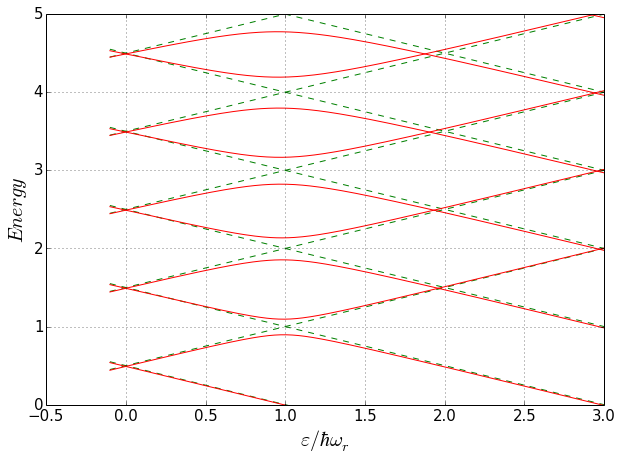

In [195]:
for i in range(0, 10):
    plt.plot(linspace(-0.1, 3, 250), array(unpert)[:,i], '--g')
    plt.plot(linspace(-0.1, 3, 250), array(pert)[:,i], 'red')
plt.gcf().set_size_inches(10, 7)
plt.xlabel(r"$\varepsilon/\hbar\omega_r$", fontsize=20)
plt.ylabel("$Energy$", fontsize=20)
plt.grid()
# plt.gcf().set_size_inches(15,20)
# plt.xlim(1.95, 2)
plt.ylim(0,5)

### Зависимость от магнитного поля

$\sqrt{\varepsilon^2+\delta^2} = \omega_r$

$\varepsilon^2+\delta^2 = \omega_r^2$

$\delta = \pm\sqrt{\omega_r^2-\varepsilon^2} = \pm \sqrt{1 - 0.04\cdot1} = \sqrt{1-0.04}\approx 1-0.02 = 0.98$

In [52]:
font = {'size'   : 15}

matplotlib.rc('font', **font)

In [31]:
osc_levels=10
omega = 1
g = .1*omega
varepsilon = 0.15
delta = 0

unpert = []
pert = []
pert2 = []
exact = []
MEs = linspace(-1.5, 1.5, 500)
for delta in MEs:
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem_test(RWA=False)
    unpert.append(evals_unpert)
    exact.append(evals)
    
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem_test(RWA=True)
    pert.append(evals)
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem_test2(RWA=True)
    pert2.append(evals)

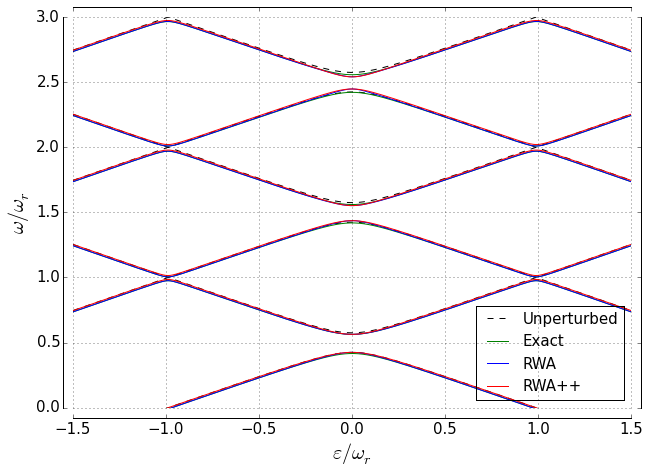

In [92]:
for i in range(0, 10):
    plt.plot(MEs, array(unpert)[:, i], '--', color='black', label = "Unperturbed" if i==0 else "_")
    plt.plot(MEs, array(exact)[:, i], '-', color='g', label = "Exact" if i==0 else "_")
    plt.plot(MEs, array(pert2)[:, i], '-', color='b', label = "RWA" if i==0 else "_")
    plt.plot(MEs, array(pert)[:, i], '-', color='red', label = "RWA++" if i==0 else "_")

#     plt.plot(MEs, array(unpert)[:,i+1]-array(unpert)[:,i], '--', color='black', label = "g = 0" if i==0 else "_")
#     plt.plot(MEs, array(unpert)[:,i+2]-array(unpert)[:,i], '--', color='black')

#     plt.plot(MEs, array(pert)[:,i+1]-array(pert)[:,i], 'red', label = r"RWA++, g = 0.1 $\omega_r$" if i==0 else "_")
#     plt.plot(MEs, array(pert)[:,i+2]-array(pert)[:,i], 'red')

#     plt.plot(MEs, array(pert2)[:,i+1] -array(pert2)[:,i], 'b', label = r"RWA, g = 0.1 $\omega_r$" if i==0 else "_")
#     plt.plot(MEs, array(pert2)[:,i+2] -array(pert2)[:,i], 'b')

#     plt.plot(MEs, array(exact)[:,i+1]-array(exact)[:,i], '-g', label = r"Exact, g = 0.1 $\omega_r$" if i==0 else "_")
#     plt.plot(MEs, array(exact)[:,i+2]-array(exact)[:,i], '-g')

#     plt.plot(linspace(-1, 2, 1000), array(pert)[:,i]-array(unpert)[:,i], 'red')
dict(plt.gca().spines.items())["left"].set_position(('outward', 10))
dict(plt.gca().spines.items())["bottom"].set_position(('outward', 10))
dict(plt.gca().spines.items())["top"].set_position(('outward', 10))
dict(plt.gca().spines.items())["right"].set_position(('outward', 10))
plt.gcf().set_size_inches(10,7)
plt.xlabel(r"$\varepsilon/\omega_r$", fontsize=20)
plt.ylabel(r"$\omega/\omega_r$", fontsize=20)
plt.grid()
plt.legend(loc=4, fontsize=15)
plt.xlim(-1.5, 1.5)
# plt.xticks(linspace(0, 1.2, 5));
plt.ylim(0,3)
# plt.yticks(linspace(0.1, 1.3, 7), fontsize=15);
# plt.xticks(linspace(-1.5, 1.5, 7), fontsize=15);
# plt.ylim(0.1, 1.3)


# fig = plt.gcf()
# axes2 = fig.add_axes([0.313,0.75, 0.4, 0.15])
# axes2.plot(MEs, array(unpert)[:,1]-array(unpert)[:,0], '--', color='black')
# axes2.plot(MEs, array(unpert)[:,2]-array(unpert)[:,0], '--', color='black')
# axes2.plot(MEs, array(exact)[:,1]-array(exact)[:,0], '-g')
# axes2.plot(MEs, array(exact)[:,2]-array(exact)[:,0], '-g')
# axes2.plot(MEs, array(pert)[:,1]-array(pert)[:,0], '-r')
# axes2.plot(MEs, array(pert)[:,2]-array(pert)[:,0], '-r')
# axes2.plot(MEs, array(pert2)[:,1]-array(pert2)[:,0], '-b')
# axes2.plot(MEs, array(pert2)[:,2]-array(pert2)[:,0], '-b')

# axes2.set_ylim(0.995, 1.015)
# axes2.patch.set_facecolor('white')
# axes2.grid()
# plt.xticks(linspace(-1.5, 1.5, 7), fontsize=12);
# plt.yticks(linspace(0.995, 1.015, 3), fontsize=12);
# axes2.get_yaxis().get_major_formatter().set_useOffset(False)
plt.savefig("../Собсно диплом/Pictures/rabi_spectrum.png", dpi=200)

# Теория возмущений

In [64]:
M = build_H_0_test()+ build_H_i_RWA_test() 
M1= build_H_0_test()+ build_H_i_RWA_test() + (build_H_i_RWA_test2()-build_H_i_RWA_test())

In [65]:
scipy.linalg.eigh(M)[0] - scipy.linalg.eigh(M1)[0]

array([ 0.00990163,  0.00989167,  0.00993045,  0.00984298,  0.00999742,
        0.00975927,  0.01009765,  0.009644  ,  0.01022776,  0.00950045,
        0.01038459,  0.00933134,  0.01056516,  0.00908632,  0.01076461,
        0.00502294,  0.01085865, -0.08579415,  0.00616029, -0.08517304])

In [66]:
evecs = scipy.linalg.eigh(M)[1]

In [67]:
evecs[:,2]

array([ 0.99980798,  0.        ,  0.        , -0.01959607,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [68]:
delta/sqrt(varepsilon**2+delta**2)

0.99503719020998915

In [71]:
evecs[:,0].T.dot(build_H_i_RWA_test2()-build_H_i_RWA_test()).dot(evecs[:,2])**2

3.8020388642455923e-06

### Квазипересечение

In [6]:
font = {'size'   : 15}

matplotlib.rc('font', **font)

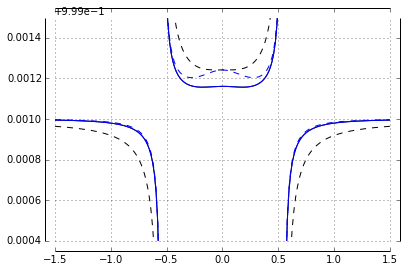

In [9]:
limit = 2
osc_levels=10
omega = 10.74115
omega_test = 10.74115

g = .011*omega
g_test = g

varepsilon = 0.5*omega
g1 = omega*1.6

Delta_test = varepsilon

freqs1 = []
freqs2 = []

X = linspace(-1.5, 1.5, 200)
for ME in X:
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem(MF=True, RWA=False)
    freqs1.append(evals[1] - evals[0])
    freqs2.append(evals[2] - evals[0])

plt.plot(X, array(freqs1)/omega, "black")
plt.plot(X, array(freqs2)/omega, "black")

freqs1 = []
freqs2 = []

for ME in X:
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem(MF=True, RWA=True)
    freqs1.append(evals[1] - evals[0])
    freqs2.append(evals[2] - evals[0])

plt.plot(X, array(freqs1)/omega, "black", linestyle="--")
plt.plot(X, array(freqs2)/omega, "black", linestyle="--")


freqs1 = []
freqs2 = []

for varepsilon_test in X*g1:
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem_test(RWA=False)
    freqs1.append(evals[1] - evals[0])
    freqs2.append(evals[2] - evals[0])

plt.plot(X, array(freqs1)/omega, "blue")
plt.plot(X, array(freqs2)/omega, "blue")

freqs1 = []
freqs2 = []

for varepsilon_test in X*g1:
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem_test(RWA=True)
    freqs1.append(evals[1] - evals[0])
    freqs2.append(evals[2] - evals[0])

plt.plot(X, array(freqs1)/omega, "blue", linestyle="--")
plt.plot(X, array(freqs2)/omega, "blue", linestyle="--")


plt.ylim(.9994, 1.0005)
plt.xlim(-1.5, 1.5)
plt.grid()

dict(plt.gca().spines.items())["left"].set_position(('outward', 10))
dict(plt.gca().spines.items())["bottom"].set_position(('outward', 10))
dict(plt.gca().spines.items())["top"].set_position(('outward', 10))
dict(plt.gca().spines.items())["right"].set_position(('outward', 10))

### Parity

In [36]:
P = scipy.linalg.expm(log(-1-0j)*(tp(dot(a_p(), a()), identity(2))+tp(identity(osc_levels), dot(sigma_m, sigma_p))))

### Dependance of $\langle \hat a \rangle$ on $\delta$

In [27]:
mean_as = []
for delta in np.linspace(-10*omega, 10*omega, 100):
    ground_state = solve_eigenproblem_test()[-1][:,0]
    mean_as.append(ground_state.dot(tp(a(), E_q)).dot(ground_state.T))

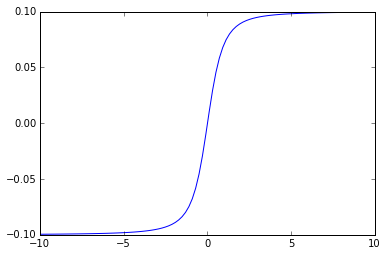

In [28]:
plt.plot(np.linspace(-10*omega, 10*omega, 100), mean_as)

In [58]:
varepsilon = 0.2
ME = 0.97975
g1=1
g=

In [62]:
scipy.linalg.eigh(build_H_0_MF()+build_H_i())[0]

array([ -0.01366331,   0.96328699,   1.00929326,   1.95461062,
         2.01791497,   2.94853234,   3.02394205,   3.94388209,
         4.02854443,   4.94019141,   5.03219047,   5.93721245,
         6.03512913,   6.93484859,   7.0376023 ,   7.93575772,
         8.0440945 ,   8.96791073,   9.1426833 ,  10.11603594])

In [61]:
omega=1

In [66]:
mp(build_H_0_MF()+build_H_i())

0.60 0.49 0.00 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.49 0.40 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.12 1.60 0.49 0.00 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.12 0.00 0.49 1.40 0.17 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.17 2.60 0.49 0.00 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.17 0.00 0.49 2.40 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.20 3.60 0.49 0.00 0.24 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.20 0.00 0.49 3.40 0.24 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.24 4.60 0.49 0.00 0.26 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.24 0.00 0.49 4.40 0.26 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0

In [32]:
def mp(a):
    toggle1 = 0
    for i in range(0, a.shape[0]):
        if a.shape[0] > 29:
            if i>10 and i< (a.shape[0]-10):
                if toggle1 == 0:
                    for j in range(0, 35):
                        print("...", end = "")
                    print("")
                    toggle1=1
                continue
        toggle = 0
        for j in range(0, a.shape[1]):
            if a.shape[1] > 29:
                if j>10 and j< (a.shape[1]-10):
                    if toggle == 0: print(" ... ", end="")
                    toggle = 1
                    continue
            if (i==j):
                print('\x1b[31m', end="")
            print("%4.2f"%round(a[i,j],2), end=" ")
            print('\x1b[0m', end="")
        print("")